In [25]:
# Step 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
# Step 2
data = pd.read_csv('../data/bike_share.csv')
data.head()

,date,hour,rentals
0,1/1/2011,0,16
1,1/1/2011,1,40
2,1/1/2011,2,32
3,1/1/2011,3,13
4,1/1/2011,4,1


In [27]:
# STep 3
data['formatted_hour'] = ['{:02}'.format(data.hour[i]) + ':00:00' for i in data.index]
data['date_time'] = pd.to_datetime(data['date'] + ' ' + data['formatted_hour'], dayfirst=True)
data.set_index(data.date_time, inplace=True, drop=True)
data.head()

,date,hour,rentals,formatted_hour,date_time
date_time,,,,,
2011-01-01 00:00:00,1/1/2011,0,16,00:00:00,2011-01-01 00:00:00
2011-01-01 01:00:00,1/1/2011,1,40,01:00:00,2011-01-01 01:00:00
2011-01-01 02:00:00,1/1/2011,2,32,02:00:00,2011-01-01 02:00:00
2011-01-01 03:00:00,1/1/2011,3,13,03:00:00,2011-01-01 03:00:00
2011-01-01 04:00:00,1/1/2011,4,1,04:00:00,2011-01-01 04:00:00


<Axes: xlabel='date_time'>

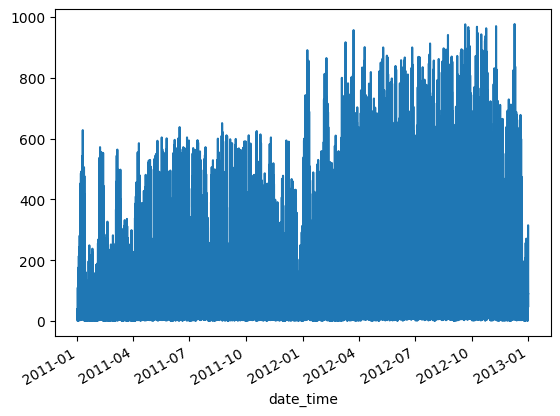

In [28]:
# Step 4
data['rentals'].plot()

In [29]:
# Step 5
data = pd.DataFrame(data['rentals'].resample('1d').sum())
data.head()

,rentals
date_time,
2011-01-01,985
2011-01-02,1360
2011-01-03,1851
2011-01-04,2227
2011-01-05,3351


<Axes: xlabel='date_time'>

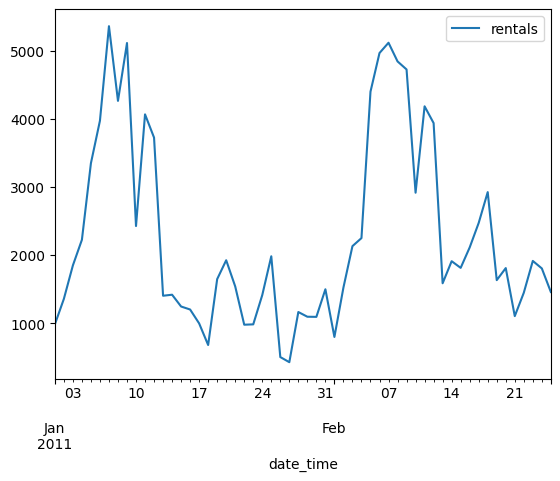

In [30]:
# Step 6
data[:56].plot()

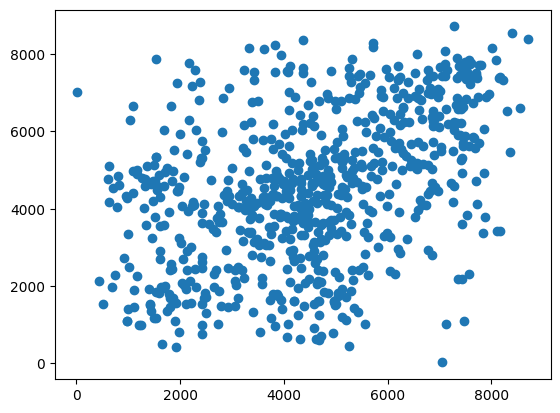

In [31]:
# Step 7
lagged_rentals = data['rentals'][:(data.shape[0] - 7)]
subplots = plt.subplots()
ax = subplots[1]
ax.scatter(lagged_rentals, data['rentals'][7:])
plt.show()

In [32]:
# Step 8
lagged_rentals.index = data.index[7:]
data['lagged_rentals'] = lagged_rentals
data

,rentals,lagged_rentals
date_time,,
2011-01-01,985,NaN
2011-01-02,1360,NaN
2011-01-03,1851,NaN
2011-01-04,2227,NaN
2011-01-05,3351,NaN
...,...,...
2012-12-27,2114,4128.0
2012-12-28,3095,3623.0
2012-12-29,1341,1749.0


In [33]:
# Step 9
model_data = data.copy()[data['lagged_rentals'].isna() == False]
model_data.head()
re_shapped_data = [
    model_data['lagged_rentals'].values.reshape(-1, 1),
    model_data['rentals'].values.reshape(-1, 1)
]
lagged_model = LinearRegression()
lagged_model.fit(
    re_shapped_data[0],
    re_shapped_data[1]
)
model_data['predicted'] = lagged_model.predict(re_shapped_data[0])
re_shapped_data.append(model_data['predicted'].values.reshape(-1, 1))
r2 = lagged_model.score(re_shapped_data[1], re_shapped_data[2])
print(f'R2 is {r2} using:')
print(model_data[['rentals', 'lagged_rentals']].head())

R2 is -0.12726694785635395 using:
            rentals  lagged_rentals
date_time                          
2011-01-08     4266           985.0
2011-01-09     5115          1360.0
2011-01-10     2429          1851.0
2011-01-11     4068          2227.0
2011-01-12     3727          3351.0


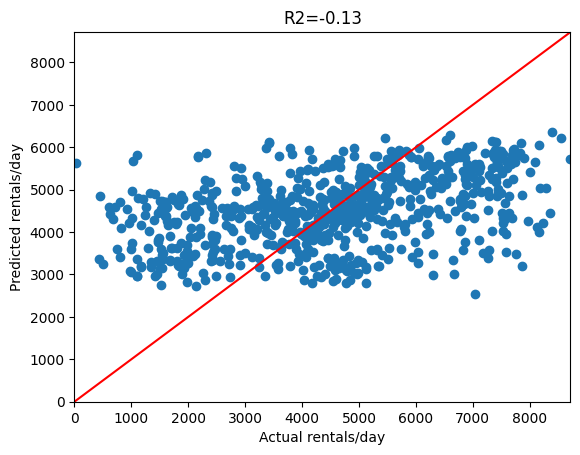

In [34]:
# Step 10
subplots = plt.subplots()
ax = subplots[1]
ax.scatter(model_data['rentals'], model_data['predicted'])
xlim = (0, max(pd.concat([model_data['predicted'], model_data['rentals']])))
ylim = xlim
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.plot(
    [xlim[0], xlim[1]],
    [ylim[0], ylim[1]],
    color='red'
)
ax.set_title(f'R2={round(r2,2)}')
ax.set_xlabel('Actual rentals/day')
ax.set_ylabel('Predicted rentals/day')
plt.show()
